# 一元线性回归
## 散点图
一家大型商业银行在多个地区设有分行, 其业务主要是进行基础设施建设、国家重点项目建设、固定资产投资等项目的贷款。近年来，该银行的贷款额平稳增长，但不良贷款额也有较大比例的增长，这给银行业务的发展带来较大压力。为弄清楚不良贷款形成的原因，管理者希望利用银行业务的有关数据做些定量分析，以便找出控制不良贷款的办法。该银行所属的25家分行2002年的有关业务数据如下。管理者想知道,不良贷款是否与贷款余额、累计应收贷款、项目贷款的多 少、固定资产投资额等因素有关?如果有关系，他们之间是一种什么样的关系？关系强度如何？试绘制散点图，分析他们之间的关系。 


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [3]:
data = pd.read_excel("data/例11.6.xlsx",header=0)
data.head()

,分行编号,不良贷款 (亿元）,各项贷款余额 (亿元),本年累计应收贷款 (亿元),贷款项目个数 (个),本年固定资产投资额 (亿元)
0,1,0.9,67.3,6.8,5,51.9
1,2,1.1,111.3,19.8,16,90.9
2,3,4.8,173.0,7.7,17,73.7
3,4,3.2,80.8,7.2,10,14.5
4,5,7.8,199.7,16.5,19,63.2


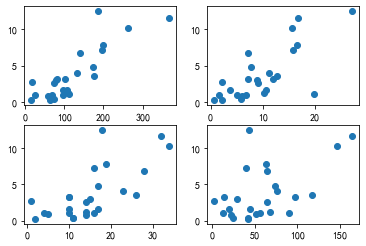

In [4]:
index = data.iloc[:,1:6] 
index1 = data.iloc[:,2] 
index2 = data.iloc[:,3] 
index3 = data.iloc[:,4] 
index4 = data.iloc[:,5] 
y = data.iloc[:,1]
fig=plt.figure()
ax1=fig.add_subplot(221)
ax1.scatter(index1,y)
ax2=fig.add_subplot(222)
ax2.scatter(index2,y)
ax3=fig.add_subplot(223)
ax3.scatter(index3,y)
ax4=fig.add_subplot(224)
ax4.scatter(index4,y)

## 相关系数
### 协方差
![协方差](img/equation.svg)

In [5]:
#print(index1.cov(y))
print(np.cov(index1,y)) # 对角线是方差
print(np.cov(index2,y))
print(np.cov(index3,y))
print(np.cov(index4,y))

[[6455.5656      244.63176667]
 [ 244.63176667   13.0271    ]]
[[40.1291     16.72518333]
 [16.72518333 13.0271    ]]
[[73.32666667 21.6435    ]
 [21.6435     13.0271    ]]
[[1613.82776667   75.18243333]
 [  75.18243333   13.0271    ]]


### 相关系数                                                                                            

In [6]:
print(index1.corr(y))
print(index2.corr(y))
print(index3.corr(y))
print(index4.corr(y))

0.843571364359289
0.7315050079594156
0.7002814906071179
0.5185180900791034


In [7]:
#列之间的相关系数
indexCorr = np.corrcoef(index,rowvar=0)
indexCorr

array([[1.        , 0.84357136, 0.73150501, 0.70028149, 0.51851809],
       [0.84357136, 1.        , 0.67877176, 0.8484164 , 0.77970216],
       [0.73150501, 0.67877176, 1.        , 0.58583149, 0.47243096],
       [0.70028149, 0.8484164 , 0.58583149, 1.        , 0.74664584],
       [0.51851809, 0.77970216, 0.47243096, 0.74664584, 1.        ]])

Text(0.5, 103.95874999999997, '亿元')

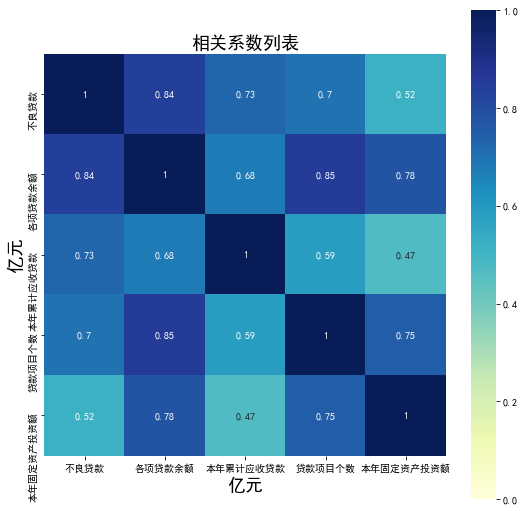

In [8]:
fig, ax = plt.subplots(figsize = (9,9))
#二维的数组的热力图，横轴和数轴的ticklabels要加上去的话，既可以通过将array转换成有column
#和index的DataFrame直接绘图生成，也可以后续再加上去。后面加上去的话，更灵活，包括可设置labels大小方向等。
dataCorrPd = pd.DataFrame(np.round(indexCorr,6), columns = ['不良贷款', '各项贷款余额', '本年累计应收贷款','贷款项目个数','本年固定资产投资额'], 
                         index = ['不良贷款', '各项贷款余额', '本年累计应收贷款','贷款项目个数','本年固定资产投资额'])
sns.heatmap(dataCorrPd,annot=True, vmax=1,vmin = 0, xticklabels= True, yticklabels= True, square=True, cmap="YlGnBu")
#sns.heatmap(np.round(a,2), annot=True, vmax=1,vmin = 0, xticklabels= True, yticklabels= True, 
#            square=True, cmap="YlGnBu")
ax.set_title('相关系数列表', fontsize = 18)
ax.set_ylabel('亿元', fontsize = 18)
ax.set_xlabel('亿元', fontsize = 18) 

|r|说明：  
\[0.8,1\]: 高度相关  
\[0.5,0.8): 中度相关   
\[0.3,0.5): 低度相关  
\[0,0.3): 不相关 （需进行显著性检验） 

###  相关关系的显著性检验
#### 1. r 的抽样分布  
ρ为较大正值时，r呈现左偏分布   
ρ为较大负值时，r呈现右偏分布  
ρ接近0时，样本量n很大时，才能认为r时接近正太分布的随机变量。  
然而以r代替ρ，总假设r为正态分布，容易带来严重后果  
####  2. r的显著性检验
采用t检验
t = |r|((n-2)/(1-r^2))^.5  ~~~ t(n-2)

计算不良贷款和贷款余额之间的相关系数是否显著a = 0.05
假设   
H0 : ρ=0  
H1 : ρ!=0

In [9]:
r = 0.84
t = r * ((len(index1)-2)/(1-r**2))**.5
t

7.424621202458748

In [10]:
ta = stats.t.isf(0.05/2,len(index)-2)
ta

2.068657610419041

In [11]:
print(t>ta)
print("拒绝原假设")

True
拒绝原假设


## 一元线性回归
![1-1](img/1-1.jpg) 或者![1-2](img/1-2.jpg)


In [12]:
n = len(index1)
beta1 = (n *sum(index1 * y) - sum(index1) *sum(y))/(n* sum(index1**2)- sum(index1)**2)
beta1

0.03789470695901016

In [13]:
beta0 = y.mean() - beta1* index1.mean()
beta0

-0.8295206165462328

In [14]:
def regression1(x):
    return beta0+beta1*x 

### 回归直线的拟合优度
#### 判定系数

![1-3](img/1-3.jpg)

In [17]:
SSR = (regression1(index1)-y.mean())**2
SSR.sum()

222.4859786567588

In [20]:
SST = (y-y.mean())**2
SST.sum()

312.6504

In [25]:
#相关系数根号
RR = SSR.sum()/SST.sum()
RR

0.7116126467669921

#### 估计标准误差
![1-4](img/1-4.jpg)

In [24]:
Se = ((1-RR)*SST.sum()/(len(y)-2))**.5
Se

1.9799475327176819

即平均的估计误差为1.9799475327176819 亿元
### 显著性检测
![1-5](img/1-5.jpg)
![1-6](img/1-6.jpg)

In [32]:
SSE = SST.sum() - SSR.sum()
n= len(y)
F =  (SSR.sum()/1) / (SSE/(n-2))
F

56.75384406478021

In [33]:
Fa = stats.f.isf(0.05,1,n-2)
Fa

4.279344309144648

In [34]:
F> Fa

True

拒接原假设，两者有显著的线性关系
### 回归系数检验
```
    yi = β0 +β1xi
```  
β1服从正态分布，数学期望为：E(β1) = β1  
标准差为：  
![1-7](img/1-7.jpg)
![1-8](img/1-8.jpg)

In [44]:
#假设beta1 = 0
Sbeta1 = Se/((index1**2).sum()- (index1.sum()**2)/n)**0.5
Sbeta1

0.005030149718689911

In [41]:
t = beta1/Sbeta1
t

7.533514721879837

In [42]:
ta = stats.t.isf(0.05/2,n-2)
ta

2.068657610419041

In [43]:
t>ta

True

拒绝原假设，两者存在明显的线性关系
## 利用回归方程进行预测
### 平均值区间估计
![1-9](img/1-9.jpg)

In [46]:
#当x0 = 100 时 95%置信区间
y0 = regression1(100)
y0

2.9599500793547837

In [52]:
r = ta * Se * (1/n + (100 - index1.mean())**2/sum((index1 - index1.mean())**2))**0.5
r

0.8458804229621194

In [54]:
print("y均值在"+str(y0-r)+"和"+str(y0+r)+"之间")

y均值在2.1140696563926644和3.805830502316903之间


### 个别值的区间估计
![1-10](img/1-10.jpg)

In [60]:
y0 = regression1(72.8)
r = ta * Se * ((n+1)/n + (72.8 - index1.mean())**2/sum((index1 - index1.mean())**2))**0.5
r

4.206050277649333

In [61]:
print("y预测在"+str(y0-r)+"和"+str(y0+r)+"之间")

y预测在-2.276836227579626和6.135264327719041之间


### 残差分析

In [63]:
y_ = y- regression1(index1)
y_

0    -0.820793
1    -2.288160
2    -0.926264
3     0.967628
4     1.061948
5     2.915626
6    -1.640371
7     6.303842
8    -1.812161
9     0.670786
10   -1.303320
11   -0.180160
12   -0.591109
13   -2.286895
14    1.044265
15    0.824470
16    0.468679
17   -1.555740
18    0.893521
19    2.346998
20   -1.523310
21   -1.197003
22   -2.123739
23    0.594579
24    0.156682
dtype: float64

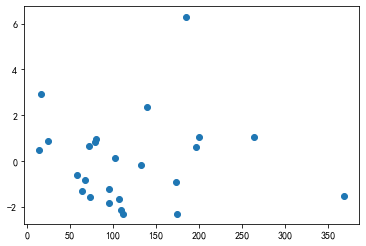

In [64]:
plt.scatter(index1, y_)

# 多元线性回归

![2-1](img/2-1.jpg)

In [131]:
from sklearn import linear_model 
feature  = index.iloc[:,1:5]
feature.insert(0,'x',np.ones(n))
model = linear_model.LinearRegression()
model.fit(feature, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
model.coef_

array([ 0.        ,  0.04003935,  0.14803389,  0.01452935, -0.02919287])

![2-2](img/2-2.jpg)
![2-3](img/2-3.jpg)
![2-4](img/2-4.jpg)

In [133]:
model.intercept_

-1.021639762985917

In [134]:
y_pred = model.predict(index)
y_pred

array([ 1.23717617,  3.94464939,  5.14051401,  3.00138093,  7.84784677,
       -0.09702264,  4.51985246,  9.39625551,  1.59121198,  1.56664319,
        0.77304537,  4.02462456,  1.75068325,  4.80854023,  8.04946297,
        2.81605615, -1.54019795,  2.215896  ,  0.37443472,  4.15541063,
       11.88804787,  2.21886608,  3.11263773,  8.2465296 ,  2.15745504])

In [141]:
SSE = sum((y_pred - y)**2)
SST = sum((y - y.mean())**2)
RR = 1-SSE/SST
RR

0.7976039890844782

#### 调整的多重判定系数
![2-5](img/2-5.jpg)

In [137]:
RRa =1-(1-RR)*((n-1)/(n-4-1))
RRa

0.7571247869013737

在4个参数的多元方程中可解释性为75.7%
![2-6](img/2-6.jpg)

In [138]:
Se =(SSE/(n-4-1))**.5
Se

1.7787522842029224

平均预测误差为1.78亿元
### 显著性检测

多元回归中，多个自变量只要有一个自变量和与因变量线性关系显著，F检验就能通过，但是这并不意味着所有的自变量都线性相关。
回归系数检测用于判断每个自变量对因变量的影响是否显著。
#### 线性检验

![2-7](img/2-7.jpg)

In [145]:
SSR = sum((y_pred - y.mean())**2)
F = SSR/4 /(SSE/(n-4-1))
F

19.704044202170337

In [146]:
Fa = stats.f.isf(0.05,4,n-5)
Fa

2.8660814020156584

In [147]:
F>Fa

True

拒绝原假设，关系是显著的
#### 回归系数检验和推断
![2-8](img/2-8.jpg)
![2-9](img/2-9.jpg)

In [159]:
def t(beta,x):
    return beta/(Se/(sum(x**2)-1/n*(sum(x)**2))**.5)

In [160]:
t1 =t(model.coef_[1],index1)
t1

8.860216776029759

In [155]:
Se/(sum(index1**2)- (index1.sum()**2)/n)**5

1.9924515465819136e-26

In [166]:
sum(index1**2) - 1/25 * sum(index1)**2

154933.57440000022

In [169]:
model.coef_[1]*154933.57440000022**.5/Se

8.860216776029757